In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300
colors = sns.color_palette("colorblind")
# Set global font size
plt.rcParams.update({'font.size': 14})

# Figure 2.1: Breast cancer incidence

In [28]:
df_incidence_mortality = pd.read_csv('dataset-asr-inc-and-mort-females-in-2022-world.csv')
#df_incidence_mortality = df_incidence_mortality[df_incidence_mortality["Label"].notna()]
df_incidence_mortality = df_incidence_mortality[["Label", "Type", "ASR (World)", "Crude rate", "Total"]]
df_incidence_mortality

,Label,Type,ASR (World),Crude rate,Total
0,"Lip, oral cavity",0,2.29,3.09,120847
1,"Lip, oral cavity",1,1.07,1.47,57630
2,Salivary glands,0,0.49,0.62,24120
3,Salivary glands,1,0.18,0.25,9953
4,Oropharynx,0,0.39,0.51,20061
...,...,...,...,...,...
77,NaN,1,0.00,0.00,0
78,NaN,1,0.00,0.00,0
79,NaN,1,0.00,0.00,0
80,NaN,1,0.00,0.00,0


In [29]:
df_incidence = df_incidence_mortality[df_incidence_mortality["Type"] == 0]
df_incidence.index = df_incidence["Label"]
df_incidence = df_incidence.drop(columns=["Label", "Type"])

df_mortality = df_incidence_mortality[df_incidence_mortality["Type"] == 1]
df_mortality.index = df_mortality["Label"]
df_mortality = df_mortality.drop(columns=["Label", "Type"])

In [30]:
df_asr = pd.concat([df_incidence["ASR (World)"], df_mortality["ASR (World)"]], axis=1)
df_asr.columns = ["Incidence", "Mortality"]

df_asr = df_asr.sort_values(by="Incidence", ascending=False)

In [31]:
df_total = pd.concat([df_incidence["Total"], df_mortality["Total"]], axis=1)
df_total.columns = ["Incidence", "Mortality"]

df_total = df_total.sort_values(by="Incidence", ascending=False)

/tmp/ipykernel_498384/798991712.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.abs(ax.get_xticks()).astype(int))


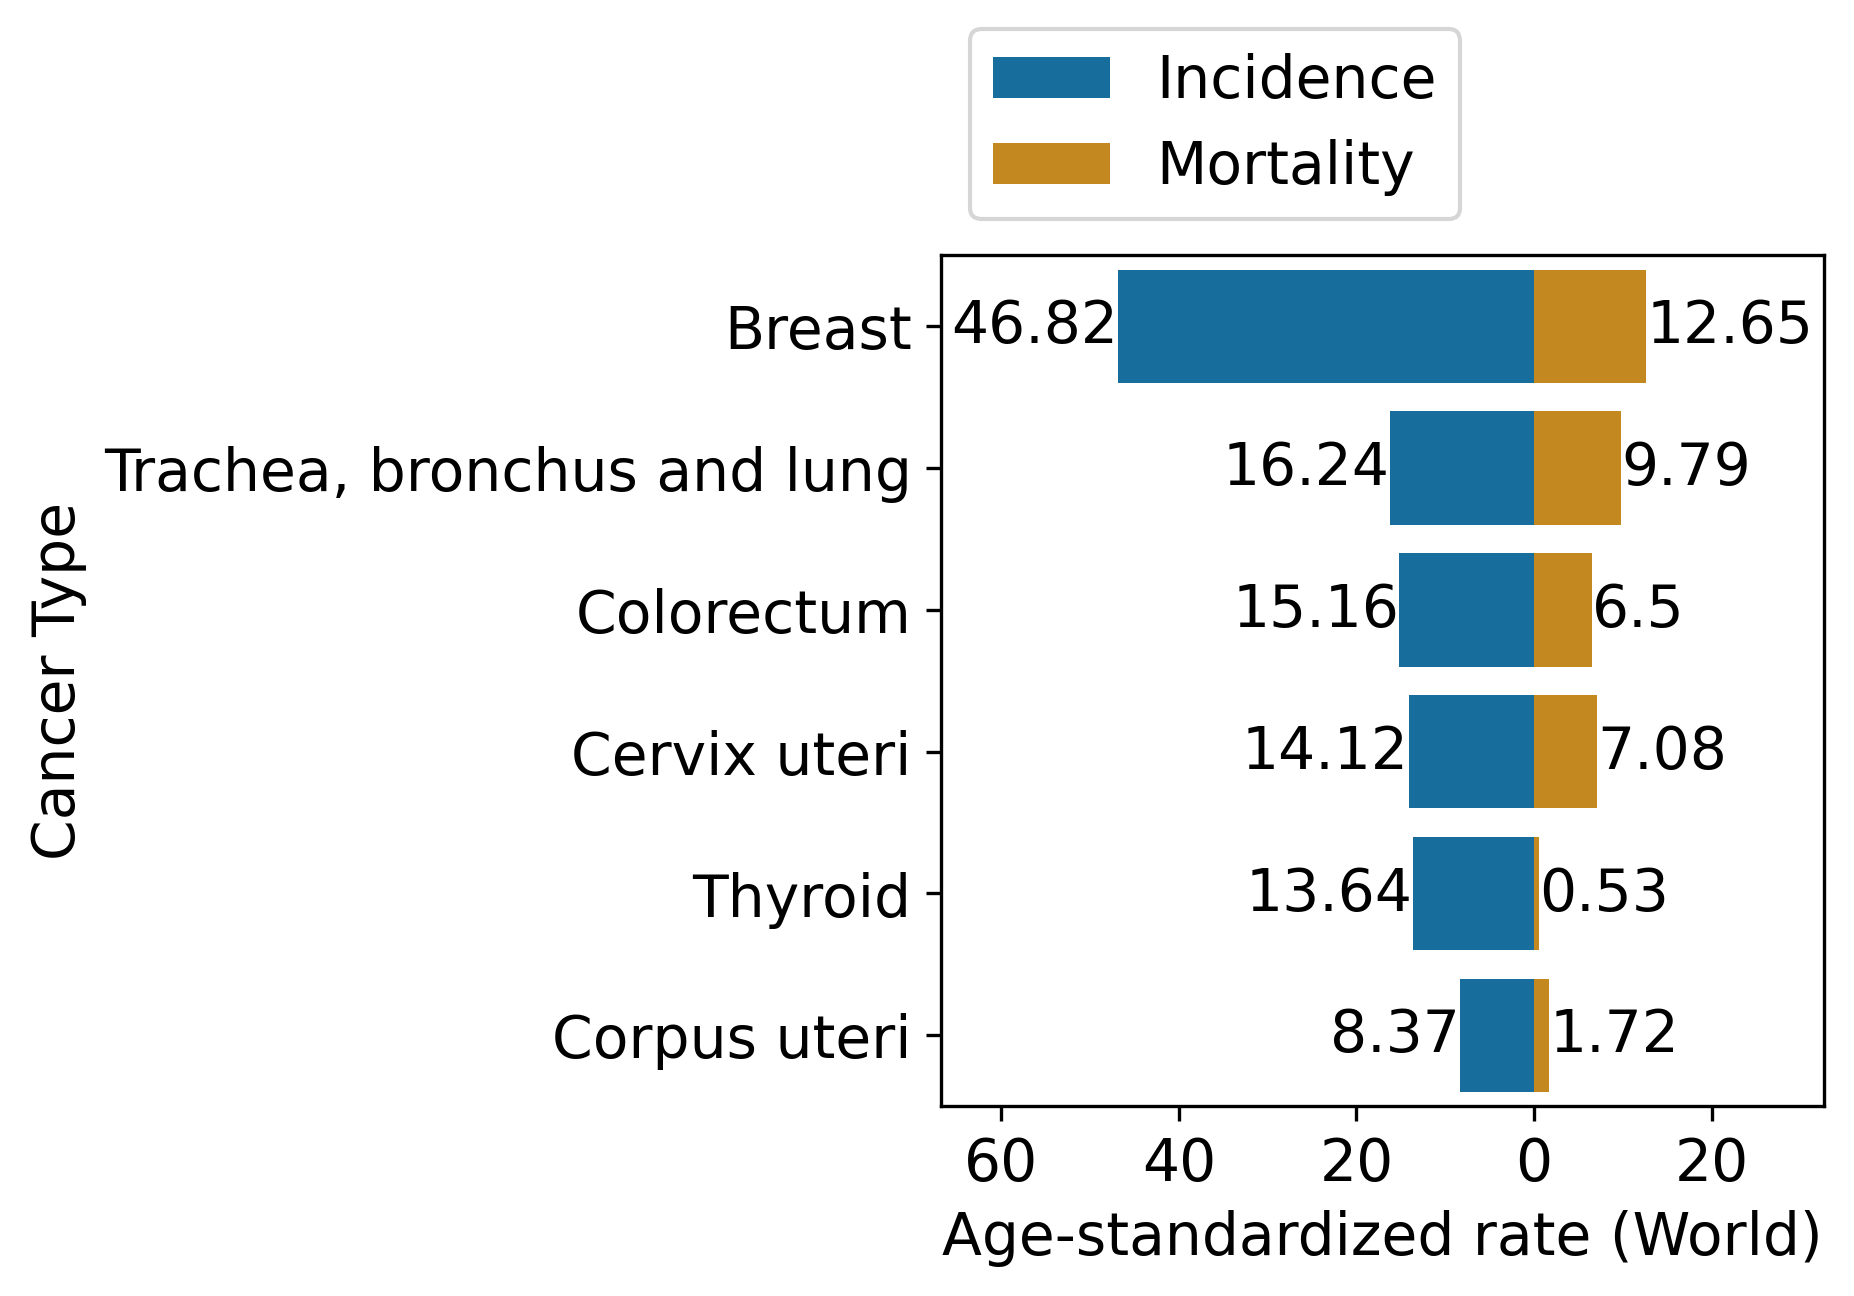

In [45]:
df_barplot = df_asr.head(6).copy()

df_barplot["Incidence"] = -df_barplot["Incidence"]

fig, ax = plt.subplots()

sns.barplot(data=df_barplot, y=df_barplot.index, x="Incidence", color=colors[0], label="Incidence", ax=ax)
sns.barplot(data=df_barplot, y=df_barplot.index, x="Mortality", color=colors[1], label="Mortality", ax=ax)

# Add bar labels, use absolute values
ax.bar_label(ax.containers[0], labels=np.abs(df_barplot["Incidence"]))
ax.bar_label(ax.containers[1], labels=np.abs(df_barplot["Mortality"]))

# Add space between bars
delta = 20
ax.set_xlim(min(df_barplot["Incidence"]) - delta, max(df_barplot["Mortality"]) + delta)

# Set axis labels
ax.set_ylabel("Cancer Type")
ax.set_xlabel("Age-standardized rate (World)")

# Use absolute values for x-axis
ax.set_xticklabels(np.abs(ax.get_xticks()).astype(int))

# Change legend position
ax.legend(loc="upper left", bbox_to_anchor=(0, 1.3))

plt.tight_layout()
plt.savefig("../chapters/2_background/figures/bar.png")

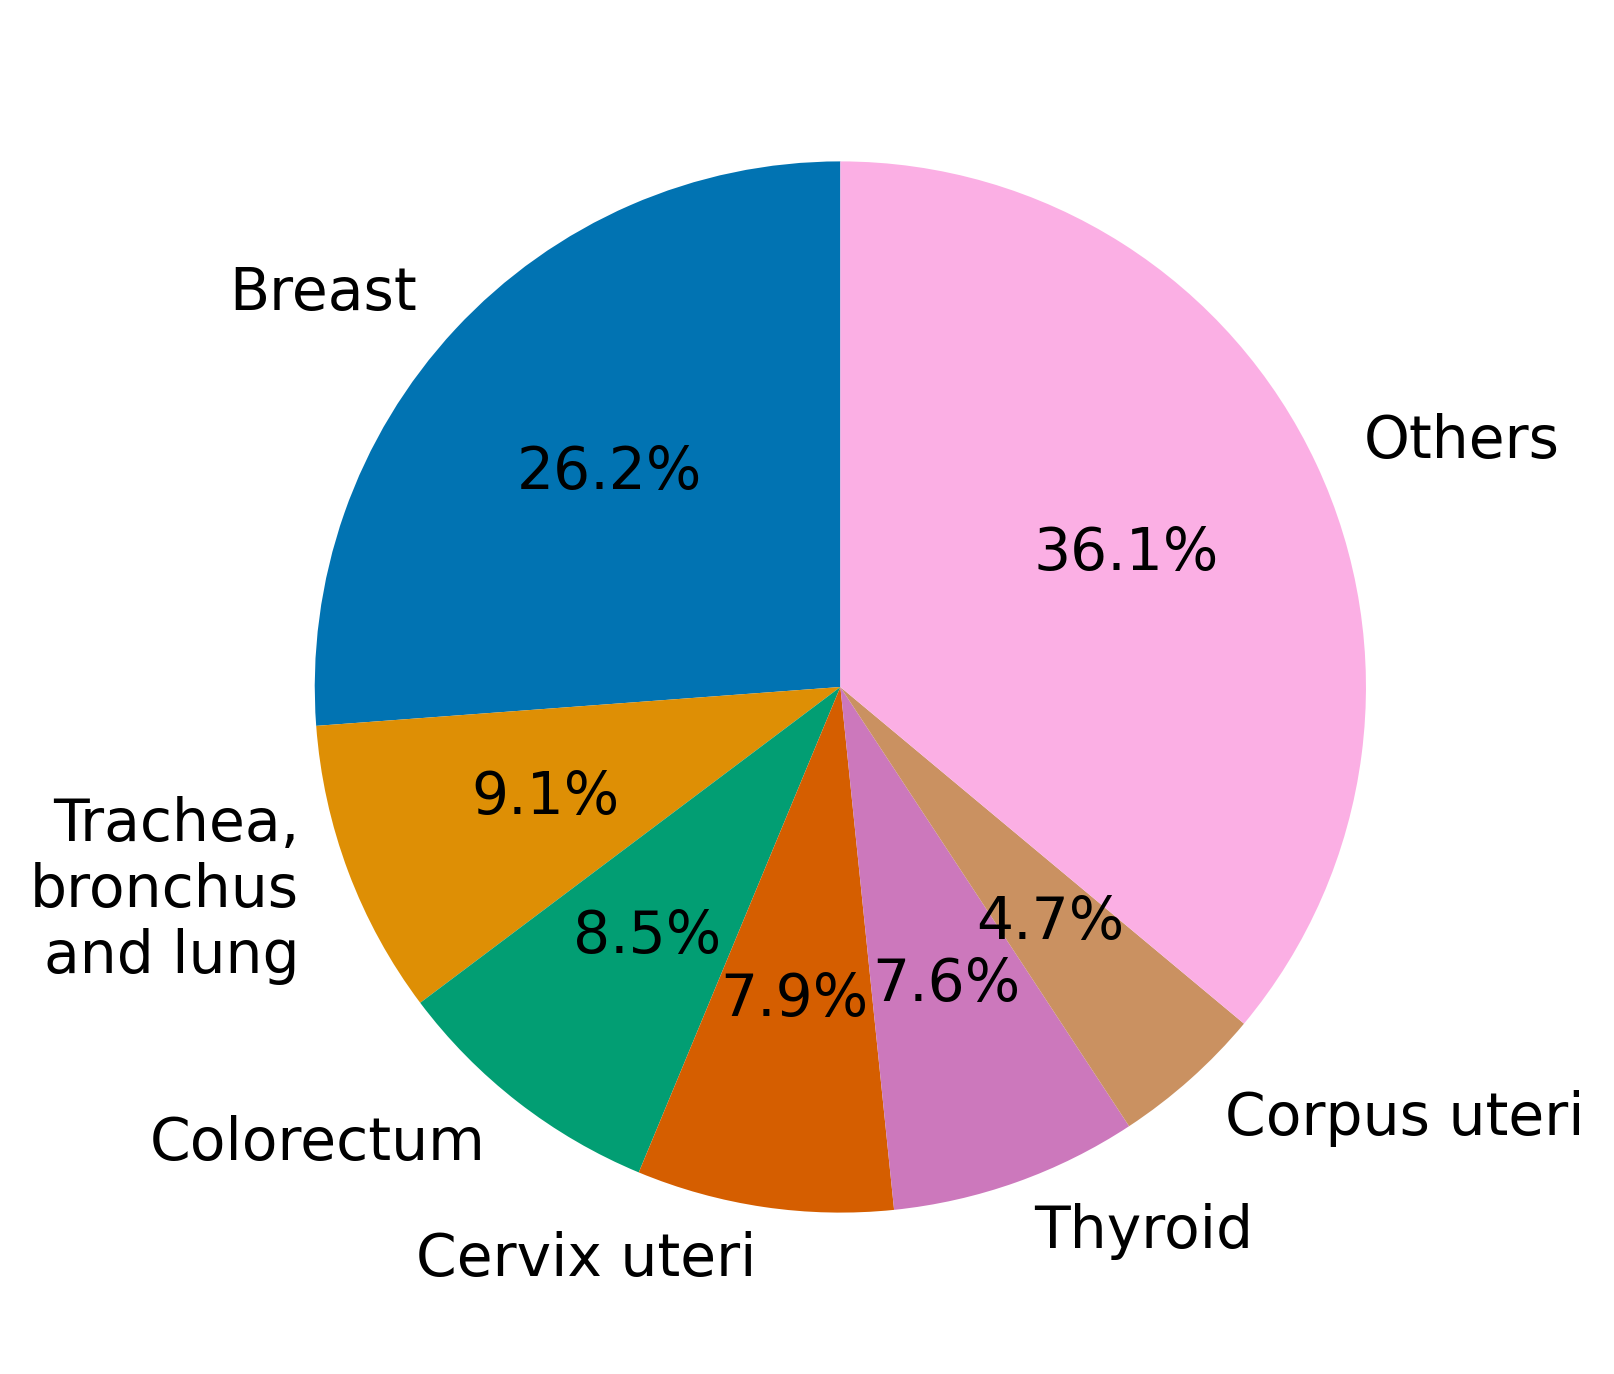

In [33]:
# Add pie chart
df_pieplot = df_asr.copy()
df_pieplot["Incidence"] = df_pieplot["Incidence"] / df_pieplot["Incidence"].sum()
df_pieplot["Mortality"] = df_pieplot["Mortality"] / df_pieplot["Mortality"].sum()

df_pieplot = df_pieplot.head(6)
df_pieplot.index = df_pieplot.index.map(lambda x: {"Trachea, bronchus and lung": "Trachea,\nbronchus\nand lung"}.get(x, x))

# Create "others" category
df_pieplot.loc["Others"] = 1 - df_pieplot.sum()

plt.pie(df_pieplot["Incidence"], labels=df_pieplot.index, colors=colors, autopct='%1.1f%%', startangle=90)

plt.tight_layout()
plt.savefig("../chapters/2_background/figures/pie.png")